In [14]:
import csv
import numpy as np
import pandas as pd
import sklearn
import math
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz
import pydot
import matplotlib.pyplot as plt

In [15]:
features = pd.read_csv('onpr.csv')

#separate features from the known number of shares
shares = np.array(features[' shares'])


In [16]:
#remove labels from features. Axis 1 = the column names

sharesCol = shares

sharesColZeroOne=[0]*39630

i=0
while i<len(sharesCol):
    if sharesCol[i]>946 and sharesCol[i] <=2800:
        sharesColZeroOne[i] = 2 #normal
        i=i+1
    elif sharesCol[i]>2800:
        sharesColZeroOne[i]=3 #super duper duper popular
        i=i+1
    else:
        sharesColZeroOne[i] = 1 
        i=i+1 #not popular
        
print(sharesColZeroOne[:100])

[1, 1, 2, 2, 1, 1, 1, 1, 3, 1, 2, 2, 1, 3, 1, 2, 3, 3, 3, 3, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 3, 3, 1, 1, 3, 1, 3, 2, 1, 2, 2, 1, 3, 2, 2, 1, 1, 2, 1, 2, 3, 1, 1, 3, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 3, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 3, 1, 1, 1, 3, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 3, 3, 1, 1, 2]


In [17]:
csv_input = pd.read_csv('onpr.csv')
csv_input[' pop shares'] = sharesColZeroOne
csv_input.to_csv('output.csv', index=False)

In [18]:
features = pd.read_csv('output.csv')
features = features.drop(' shares', axis = 1)
features = features.drop('id', axis = 1)
features = features.drop('pub_date', axis = 1)
features = features.drop('url', axis = 1)
shares = np.array(features[' pop shares'])
features = features.drop(' pop shares', axis = 1)

In [19]:
#but save these feature names for when we are done
feature_list = list(features.columns)

In [20]:
features = np.array(features)

#We split data up into training and training sets. 
train_features, test_features, train_labels, test_labels = train_test_split (features, shares, test_size = 0.25, random_state = 42)



In [21]:
print(train_features[1])
print("hbu")
print(test_features[1])

[ 1.          0.          0.          0.          0.          0.
  0.          1.          1.          0.          0.          0.
  0.          0.          0.          0.          0.         15.98873678]
hbu
[ 1.          9.          0.          0.          0.          1.
  0.          0.          0.          0.          0.          0.
  0.          0.          1.          0.          0.         20.06305066]


In [22]:

#makes a "forest" with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

#trains data here
rf.fit(train_features, train_labels);


In [23]:
#Predict!
predictions = rf.predict(test_features)

In [24]:

#calculating errors
errors = abs(predictions - test_labels) #find errors
print('Mean absolute error:', round(np.mean(errors), 2))



#find mean absolute percentage error: 
perc = 100 * (errors / test_labels)
accuracy = 100-np.mean(perc)
print('Accuracy:', round(accuracy, 2), '%.')

Mean absolute error: 0.58
Accuracy: 63.18 %.


In [25]:
#Variable importance: 
#can tell you how much incuding a certain variable improves the prediciton 
importances = list(rf.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: ari                  Importance: 0.49
Variable: content_trending     Importance: 0.13
Variable:  num_imgs            Importance: 0.1
Variable:  num_videos          Importance: 0.05
Variable: title_trending       Importance: 0.03
Variable: entertainment        Importance: 0.02
Variable: world                Importance: 0.02
Variable: monday               Importance: 0.02
Variable: tuesday              Importance: 0.02
Variable: wednesday            Importance: 0.02
Variable: thursday             Importance: 0.02
Variable: friday               Importance: 0.02
Variable: lifestyle            Importance: 0.01
Variable: business             Importance: 0.01
Variable: social_media         Importance: 0.01
Variable: tech                 Importance: 0.01
Variable: saturday             Importance: 0.01
Variable: sunday               Importance: 0.01


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

Text(0.5,1,'Variable Importances')

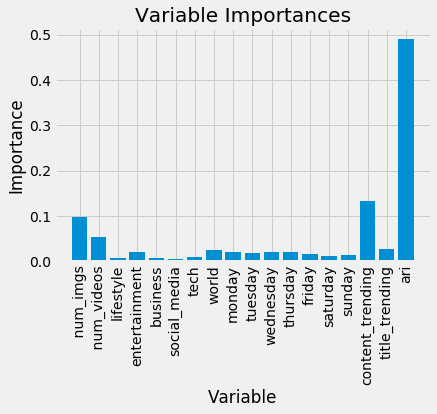

In [26]:
#visualization of variable importance

%matplotlib inline
plt.style.use('fivethirtyeight')
x_values = list(range(len(importances)))
plt.bar(x_values, importances, orientation = 'vertical')
plt.xticks(x_values, feature_list, rotation='vertical')

plt.ylabel('Importance'); plt.xlabel('Variable')
plt.title('Variable Importances')